In [2]:
import glob
import csv
import os
from tsne import bh_sne
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import StratifiedKFold                                                                                                                       
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm

import numpy as np
from numpy.random import RandomState
np.random.seed(1)

In [3]:
flist = glob.glob("train/*.asm")

In [4]:
num_samples = len(flist)
print("Number of samples: %i" %(num_samples))

Number of samples: 10868


In [5]:
flist

['train/0mgFnqeLAMr7jthUYRTv.asm',
 'train/4EnNLux3rOG8i0W9DBVf.asm',
 'train/aBzIwsiXPGYFxKEgOu2q.asm',
 'train/grbAvIxKkFeLica6D2QJ.asm',
 'train/HaWuY5IXN7gOmJG4ZCkd.asm',
 'train/C0zcsP1IiGEXyLkx6bp2.asm',
 'train/IZeQVP4mMEwxvrzfUd6R.asm',
 'train/iwKlT6Fh3qfXp2kdVS7a.asm',
 'train/4syoiE9gr1HVtAfwTQY8.asm',
 'train/hTWBq5QXgOm0eKV9ktRu.asm',
 'train/9zbitD6NE10I4FjdgJvV.asm',
 'train/IpiH1PbUFYZwRWe2jl5t.asm',
 'train/JhBYHQsTMGWqaf24Ou0p.asm',
 'train/2UcBWPt6mf8dohDsYxOR.asm',
 'train/0uNkt6sirCnUWw175pjl.asm',
 'train/iks3Y5jQmILCpn8O6wR7.asm',
 'train/auQidPmlt1NneSZ7FRjs.asm',
 'train/3Isqvz4GW6LAxUaZP7f0.asm',
 'train/euLEGg3lHfAIJz9dvyqa.asm',
 'train/av7Nljxu5MQ3q1b9roUk.asm',
 'train/c7LBl4CN0AQdheFin9v8.asm',
 'train/7dNt3WEY0kxjshoeLAw5.asm',
 'train/GKdvW298FpuQAamNZlqn.asm',
 'train/hQ3EP5rHNeKgWXGIaZUC.asm',
 'train/gC6s297ohTDUNO3IzpKM.asm',
 'train/h2cdZou5ylgEQaUiJvSD.asm',
 'train/8Tvltu5MUWOfgNsSnKi3.asm',
 'train/1LE6uK9BdgNXIcSTnrMJ.asm',
 'train/hl6kTIUWGfd9

In [6]:
x86instructions = ['aaa','aad','aam','aas','adc','adcx','add','addpd','addps','addsd','addss','addsubpd','addsubps','adox','aesdec','aesdeclast','aesenc','aesenclast','aesimc','aeskeygenassist','and','andn','andnpd','andnps','andpd','andps','arpl','bextr','blendpd','blendps','blendvpd','blendvps','blsi','blsmsk','blsr','bound','bsf','bsr','bswap','bt','btc','btr','bts','bzhi','call','cbw','cdq','cdqe','clac','clc','cld','clflush','cli','clts','cmc','cmovcc','cmp','cmppd','cmpps','cmps','cmpsb','cmpsd','cmpsq','cmpss','cmpsw','cmpxchg','cmpxchg16b','cmpxchg8b','comisd','comiss','cpuid','cqo','crc32','cvtdq2pd','cvtdq2ps','cvtpd2dq','cvtpd2pi','cvtpd2ps','cvtpi2pd','cvtpi2ps','cvtps2dq','cvtps2pd','cvtps2pi','cvtsd2si','cvtsd2ss','cvtsi2sd','cvtsi2ss','cvtss2sd','cvtss2si','cvttpd2dq','cvttpd2pi','cvttps2dq','cvttps2pi','cvttsd2si','cvttss2si','cwd','cwde','daa','das','dec','div','divpd','divps','divsd','divss','dppd','dpps','emms','enter','extractps','f2xm1','fabs','fadd','faddp','fbld','fbstp','fchs','fclex','fcmovcc','fcom','fcomi','fcomip','fcomp','fcompp','fcos','fdecstp','fdiv','fdivp','fdivr','fdivrp','ffree','fiadd','ficom','ficomp','fidiv','fidivr','fild','fimul','fincstp','finit','fist','fistp','fisttp','fisub','fisubr','fld','fld1','fldcw','fldenv','fldl2e','fldl2t','fldlg2','fldln2','fldpi','fldz','fmul','fmulp','fnclex','fninit','fnop','fnsave','fnstcw','fnstenv','fnstsw','fpatan','fprem','fprem1','fptan','frndint','frstor','fsave','fscale','fsin','fsincos','fsqrt','fst','fstcw','fstenv','fstp','fstsw','fsub','fsubp','fsubr','fsubrp','ftst','fucom','fucomi','fucomip','fucomp','fucompp','fwait','fxam','fxch','fxrstor','fxsave','fxtract','fyl2x','fyl2xp1','haddpd','haddps','hlt','hsubpd','hsubps','idiv','imul','in','inc','ins','insb','insd','insertps','insw','int 3','int n','into','invd','invlpg','invpcid','iret','iretd','jmp','jcc','lahf','lar','lddqu','ldmxcsr','lds','lea','leave','les','lfence','lfs','lgdt','lgs','lidt','lldt','lmsw','lock','lods','lodsb','lodsd','lodsq','lodsw','loop','loopcc','lsl','lss','ltr','lzcnt','maskmovdqu','maskmovq','maxpd','maxps','maxsd','maxss','mfence','minpd','minps','minsd','minss','monitor','mov','movapd','movaps','movbe','movd','movddup','movdq2q','movdqa','movdqu','movhlps','movhpd','movhps','movlhps','movlpd','movlps','movmskpd','movmskps','movntdq','movntdqa','movnti','movntpd','movntps','movntq','movq','movq2dq','movs','movsb','movsd','movshdup','movsldup','movsq','movss','movsw','movsx','movsxd','movupd','movups','movzx','mpsadbw','mul','mulpd','mulps','mulsd','mulss','mulx','mwait','neg','nop','not','or','orpd','orps','out','outs','outsb','outsd','outsw','pabsb','pabsd','pabsw','packssdw','packsswb','packusdw','packuswb','paddb','paddd','paddq','paddsb','paddsw','paddusb','paddusw','paddw','palignr','pand','pandn','pause','pavgb','pavgw','pblendvb','pblendw','pclmulqdq','pcmpeqb','pcmpeqd','pcmpeqq','pcmpeqw','pcmpestri','pcmpestrm','pcmpgtb','pcmpgtd','pcmpgtq','pcmpgtw','pcmpistri','pcmpistrm','pdep','pext','pextrb','pextrd','pextrq','pextrw','phaddd','phaddsw','phaddw','phminposuw','phsubd','phsubsw','phsubw','pinsrb','pinsrd','pinsrq','pinsrw','pmaddubsw','pmaddwd','pmaxsb','pmaxsd','pmaxsw','pmaxub','pmaxud','pmaxuw','pminsb','pminsd','pminsw','pminub','pminud','pminuw','pmovmskb','pmovsx','pmovzx','pmuldq','pmulhrsw','pmulhuw','pmulhw','pmulld','pmullw','pmuludq','pop','popa','popad','popcnt','popf','popfd','popfq','por','prefetchw','prefetchwt1','prefetchh','psadbw','pshufb','pshufd','pshufhw','pshuflw','pshufw','psignb','psignd','psignw','pslld','pslldq','psllq','psllw','psrad','psraw','psrld','psrldq','psrlq','psrlw','psubb','psubd','psubq','psubsb','psubsw','psubusb','psubusw','psubw','ptest','punpckhbw','punpckhdq','punpckhqdq','punpckhwd','punpcklbw','punpckldq','punpcklqdq','punpcklwd','push','pusha','pushad','pushf','pushfd','pxor','rcl','rcpps','rcpss','rcr','rdfsbase','rdgsbase','rdmsr','rdpmc','rdrand','rdseed','rdtsc','rdtscp','rep','repe','repne','repnz','repz','ret','rol','ror','rorx','roundpd','roundps','roundsd','roundss','rsm','rsqrtps','rsqrtss','sahf','sal','sar','sarx','sbb','scas','scasb','scasd','scasw','setcc','sfence','sgdt','shl','shld','shlx','shr','shrd','shrx','shufpd','shufps','sidt','sldt','smsw','sqrtpd','sqrtps','sqrtsd','sqrtss','stac','stc','std','sti','stmxcsr','stos','stosb','stosd','stosq','stosw','str','sub','subpd','subps','subsd','subss','swapgs','syscall','sysenter','sysexit','sysret','test','tzcnt','ucomisd','ucomiss','ud2','unpckhpd','unpckhps','unpcklpd','unpcklps','vbroadcast','vcvtph2ps','vcvtps2ph','verr','verw','vextractf128','vextracti128','vfmadd132pd','vfmadd132ps','vfmadd132sd','vfmadd132ss','vfmadd213pd','vfmadd213ps','vfmadd213sd','vfmadd213ss','vfmadd231pd','vfmadd231ps','vfmadd231sd','vfmadd231ss','vfmaddsub132pd','vfmaddsub132ps','vfmaddsub213pd','vfmaddsub213ps','vfmaddsub231pd','vfmaddsub231ps','vfmsub132pd','vfmsub132ps','vfmsub132sd','vfmsub132ss','vfmsub213pd','vfmsub213ps','vfmsub213sd','vfmsub213ss','vfmsub231pd','vfmsub231ps','vfmsub231sd','vfmsub231ss','vfmsubadd132pd','vfmsubadd132ps','vfmsubadd213pd','vfmsubadd213ps','vfmsubadd231pd','vfmsubadd231ps','vfnmadd132pd','vfnmadd132ps','vfnmadd132sd','vfnmadd132ss','vfnmadd213pd','vfnmadd213ps','vfnmadd213sd','vfnmadd213ss','vfnmadd231pd','vfnmadd231ps','vfnmadd231sd','vfnmadd231ss','vfnmsub132pd','vfnmsub132ps','vfnmsub132sd','vfnmsub132ss','vfnmsub213pd','vfnmsub213ps','vfnmsub213sd','vfnmsub213ss','vfnmsub231pd','vfnmsub231ps','vfnmsub231sd','vfnmsub231ss','vgatherdpd','vgatherdps','vgatherqpd','vgatherqps','vinsertf128','vinserti128','vmaskmov','vpblendd','vpbroadcast','vperm2f128','vperm2i128','vpermd','vpermilpd','vpermilps','vpermpd','vpermps','vpermq','vpgatherdd','vpgatherdq','vpgatherqd','vpgatherqq','vpmaskmov','vpsllvd','vpsllvq','vpsravd','vpsrlvd','vpsrlvq','vtestpd','vtestps','vzeroall','vzeroupper','wait','wbinvd','wrfsbase','wrgsbase','wrmsr','xabort','xacquire','xadd','xbegin','xchg','xend','xgetbv','xlat','xlatb','xor','xorpd','xorps','xrelease','xrstor','xrstors','xsave','xsavec','xsaveopt','xsaves','xsetbv','xtest']

In [ ]:
vectorizer = CountVectorizer(input='filename', ngram_range=(2, 2), stop_words=None, vocabulary=x86instructions, decode_error='ignore', min_df=1)

In [ ]:
X = vectorizer.fit_transform(flist)

In [ ]:
X = X.todense()

In [7]:
file2gram = "Microsoft-opcode2gram.npy"
X = np.load(file2gram) 

In [8]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
X.shape

(10868, 657)

In [ ]:
file2gram = "Microsoft-opcode2gram.npy"
np.save(file2gram,X)

In [ ]:
transformer = TfidfTransformer(smooth_idf=True)

In [ ]:
tfidf = transformer.fit_transform(X)

In [ ]:
tfidf = tfidf.todense()

In [10]:
file2gramtfidf = "Microsoft-opcode2gram-tfidf.npy"
tfidf = np.load(file2gramtfidf)

In [11]:
tfidf

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [12]:
tfidf.shape

(10868, 657)

In [ ]:
file2gramtfidf = "Microsoft-opcode2gram-tfidf.npy"
np.save(file2gramtfidf,tfidf)

In [13]:
trainLabelFile = "trainLabels.csv"

In [14]:
with open(trainLabelFile) as f:
    labelDict = dict(filter(None, csv.reader(f)))

In [15]:
labelDict

{'anbzmJ7dC1EM3B9QcPDv': '2',
 'hplxP3Se6N40oMBqY81v': '1',
 'hXGizHjZ12qRYLw073eT': '6',
 'IbEo9xn38UJfk6R72XYq': '9',
 'ilxt65RehXQoDvTzdFLk': '1',
 'iSDOzmncxkoV39KgPQLy': '3',
 'JF2417UDdQBcfryqLz3g': '2',
 '3foB7xJKrR10XwsT5QSt': '3',
 '7Y5Egr0XjO8UIvNFA16L': '8',
 'HgSsanq9f8WdJ1zEN7tp': '1',
 'i6HCJxaZV5cBzW1NUuof': '3',
 '5XPfYvNdQRIBJoWmj3Os': '7',
 '05aiMRw13bYWqZ8OHvjl': '2',
 'iPrHAsaDfj9wM04dxCR7': '1',
 '45drFT2pMjSGQ71g9yke': '3',
 '8swNnb7BmL6dTVPcZK13': '3',
 'K0Z2FrjYgcqoQaUuOGWP': '3',
 'cARj7FrG15WHEQikbmBU': '2',
 '7BNLHFXEAJRS1bwZxziq': '2',
 'GdA8RwInXaH5J1OfSEpN': '2',
 'dugyFIjzTMPYlKbWrkoD': '3',
 '21XVtgk6bMRdLWP4xoKs': '8',
 'euYJQIOhtv8FlApXdo63': '6',
 '6GbjZn4wEtWSkrJUzoVc': '2',
 'G43puA6hRxYEkJnrOtbX': '1',
 '6McvAWZj4285L7XPrwnE': '7',
 'i0gZtoAOmxsID4cKHaul': '9',
 'aKQpObrHFW6ymA2uwdXP': '7',
 'KdVApoT8ODIh2ZcGE56R': '2',
 '6nfXBNI5d4jOkgmEDF31': '2',
 'fQ5YydnBoJM7gmr19AIH': '2',
 'G1W3VN56x4ouK0slHkQE': '1',
 '6v7e1UtEQSGMgmw2Ay5F': '3',
 '2Q3O0EUy

In [16]:
y = np.zeros(num_samples)
pos = 0
for f in flist:
    fname = os.path.splitext(os.path.basename(f))[0]
    print("File: %s - Class: %s" %(fname,labelDict[fname]))
    y[pos] = int(labelDict[fname])
    pos += 1

File: 0mgFnqeLAMr7jthUYRTv - Class: 8
File: 4EnNLux3rOG8i0W9DBVf - Class: 8
File: aBzIwsiXPGYFxKEgOu2q - Class: 3
File: grbAvIxKkFeLica6D2QJ - Class: 3
File: HaWuY5IXN7gOmJG4ZCkd - Class: 2
File: C0zcsP1IiGEXyLkx6bp2 - Class: 3
File: IZeQVP4mMEwxvrzfUd6R - Class: 8
File: iwKlT6Fh3qfXp2kdVS7a - Class: 2
File: 4syoiE9gr1HVtAfwTQY8 - Class: 3
File: hTWBq5QXgOm0eKV9ktRu - Class: 2
File: 9zbitD6NE10I4FjdgJvV - Class: 3
File: IpiH1PbUFYZwRWe2jl5t - Class: 2
File: JhBYHQsTMGWqaf24Ou0p - Class: 2
File: 2UcBWPt6mf8dohDsYxOR - Class: 2
File: 0uNkt6sirCnUWw175pjl - Class: 1
File: iks3Y5jQmILCpn8O6wR7 - Class: 3
File: auQidPmlt1NneSZ7FRjs - Class: 6
File: 3Isqvz4GW6LAxUaZP7f0 - Class: 2
File: euLEGg3lHfAIJz9dvyqa - Class: 6
File: av7Nljxu5MQ3q1b9roUk - Class: 2
File: c7LBl4CN0AQdheFin9v8 - Class: 3
File: 7dNt3WEY0kxjshoeLAw5 - Class: 6
File: GKdvW298FpuQAamNZlqn - Class: 2
File: hQ3EP5rHNeKgWXGIaZUC - Class: 3
File: gC6s297ohTDUNO3IzpKM - Class: 3
File: h2cdZou5ylgEQaUiJvSD - Class: 3
File: 8Tvltu

File: h5b2LH6uvWwKXc0i4joZ - Class: 2
File: 0x47zZTBynC21leohIEs - Class: 9
File: hcGXIb1VuBzeANFpqk25 - Class: 2
File: 81IgT57cylMUNGbLkiqm - Class: 2
File: BrePaE2xAs9fJtqvN1Wp - Class: 1
File: 5fvJTDKPcRtNok0OZ6WH - Class: 3
File: 1gYyAWCIEbGBJaMHL0k2 - Class: 8
File: EjtPq9DIQ5gmCZV6XnUK - Class: 2
File: 6SMZ0wGN2p3hv9rFEVcb - Class: 1
File: BDuWAEz5GFKaP4Q1k6Jd - Class: 3
File: iH5f4orQv0Z3xAlIsbWh - Class: 8
File: 6Ly7GnlwtNuax5JTX0Zo - Class: 9
File: 2vzlFiPL03STnwtDhoCU - Class: 4
File: KLc2AnjgPzWCTqV7iy0B - Class: 4
File: DkyjfaKHbhTCYr0px2iQ - Class: 4
File: 6MFXjyhwL9xW4dme1OcU - Class: 1
File: fuso63yW7wAXO20gJIBS - Class: 1
File: 4ac5qdOrj96X8SglAGZL - Class: 9
File: 0zr6vIw74DgVSKXiRUY1 - Class: 8
File: 29NR1zBEDCPM5xntsdlA - Class: 1
File: cuQ80MAm4va1koYfLeUG - Class: 9
File: HAnYJkPbuc6qWghBO7Ld - Class: 8
File: If74PKxzUtEXwO5kChoB - Class: 6
File: hVA2zb6ogGrDYKTZHLv0 - Class: 3
File: IgAFqe6bJzK94danjcG2 - Class: 3
File: k2mxrqNg1JzRiVsIbytQ - Class: 2
File: gmqz2k

File: 7K1zacbZA3HIjStR6kOs - Class: 1
File: f6IgSeW72uCHcVYjOZUx - Class: 2
File: 10Eskl6DUSGugoWxvtYO - Class: 3
File: Ce6ZVRzOT907NYXBqD4r - Class: 9
File: BM9ri8vXtbxJNem6S4wg - Class: 8
File: GQh8kxUDtRVwzEP0Wvfs - Class: 9
File: GQPk9p1ZEICdOTcxlH5W - Class: 1
File: JFGA1Ypxt56ElPa3WUOQ - Class: 2
File: e65UwgD2OfTtXkA8GluM - Class: 2
File: cRVOyGEn15HNAJClPU0X - Class: 2
File: bPjNyQd5VM3oArFuWUge - Class: 8
File: jPwdh0NtUaR9T4MIWcuE - Class: 7
File: h0IeuHBPEixRnNKVyOYq - Class: 2
File: fKhsXDozS0YNA63L54nl - Class: 8
File: 2KukNP13McOI6AH0b8op - Class: 9
File: GmEAFpP5ZO0suwaNIeqx - Class: 1
File: 4s5QmpaV1GOniI3HL7xg - Class: 3
File: 6hsJVLzbaO4P8IGZcvrT - Class: 1
File: 9iQ3G1aDjec46ULCHI8h - Class: 1
File: GOmnSkldHD5ABFoNX7Jz - Class: 9
File: 2AkLpJEONXZSefoC0BgQ - Class: 1
File: etGodBiH4V2DKrbMjx0S - Class: 6
File: dBuCJTrSQLaR8cmVjDlM - Class: 2
File: hECVdzWU83LJkc46iGMR - Class: 2
File: gkMCUHdEl6p0LXbyPItu - Class: 3
File: be32jsQYGSuXWkzOiPrN - Class: 2
File: hCB0gL

File: fak1bOn7lSJFw5WceiKP - Class: 3
File: aFjtGgxzWAseZRiLJK8I - Class: 8
File: BjChQHpi3Tya5bAO1RJz - Class: 3
File: 58Z74rMBcgQaUk3CNIFE - Class: 3
File: 8251cHixBfdqrKLoPl4v - Class: 3
File: HareMcE1jJ3WqsOXDopb - Class: 8
File: JtWKrxZDdMpCPNkRLEbH - Class: 7
File: 2LeQVofH8Jl4da69AUxk - Class: 3
File: CFGSoiZsTtUP34fk8lhN - Class: 3
File: 9FxgivRPntUB4YcV5IJa - Class: 6
File: 9lIdfH73S6PZrp54gVwA - Class: 6
File: 57QmnCGYe0pdIy3zTgJ9 - Class: 3
File: 9SwiWE4o0LVHxnZbpORa - Class: 3
File: gybTWSU3EjBGpCVI1JA4 - Class: 1
File: GWQal1VFCtwrE47xNeSJ - Class: 2
File: dvPzx04ftaoVyH1RDnTr - Class: 6
File: HJux0O46yzU7XF5slVQA - Class: 3
File: dvusqezCcGVfjZ4H7My1 - Class: 7
File: 4mETUDblC7Ffhq5yoK8c - Class: 1
File: Bj1A0a6Ec4MIUQzfsTg7 - Class: 4
File: 6tMgf5pGIsvHSn83WZyx - Class: 1
File: 7sbEMLcRn1mktlNwzdxW - Class: 2
File: HvODZ7dlIkSCKzyP1pXR - Class: 7
File: jvCHpBTKuE264UVP1qnx - Class: 2
File: 2Q94lEwIimV0z13xXNLY - Class: 3
File: DtnYlsgyQ654Xiw3dkoR - Class: 6
File: jw6dqJ

File: DpRqhyeIswlXrdF7YVTv - Class: 8
File: fy0LNRhDO6mHbB148onM - Class: 2
File: 79ZlfG6CozviMAFYnWhK - Class: 3
File: J1OuMlSZboYIRXC03jQD - Class: 6
File: CQwNADZxFXBh9fUlOuao - Class: 1
File: 9AFl6gbmVOB8zWPISnX0 - Class: 1
File: arHTiWpEOMctLjx3Gnv2 - Class: 1
File: cnms0zSvd3FqDexiwZo6 - Class: 3
File: gjwqQk8r5ztTZcMfC3VU - Class: 2
File: H9W6IBvFuM47N01krXY8 - Class: 2
File: 39SjamCOL05zq1Eni4Qf - Class: 3
File: iPFa4r6moSNthpqB2RDV - Class: 9
File: JoDLpkCx5ziwtAU73NVF - Class: 3
File: EIl9Q8FRt6skSYXTzCw3 - Class: 1
File: 6c5KqjIDH74gkzON2V8B - Class: 2
File: izRtJ6ELUuCPWAxB9ZOs - Class: 8
File: g1639t4hNmJ8DWwBO5cA - Class: 9
File: 0EAdHtLDypMcwjTFJziC - Class: 2
File: i9psO08wRdorlvU2HBSj - Class: 3
File: DPVTHpkfLrABWaqgoyjw - Class: 8
File: dJVXOqTuk80ZWBleDc2Q - Class: 8
File: iAG4k1vc8m0l7RXSYpNr - Class: 3
File: 84RrvZ0uc7kqOhsSDITN - Class: 1
File: D34oHsTMkn7vaOWFQUy8 - Class: 6
File: gYq9lthHL7vVfTSUBo2P - Class: 3
File: H14sZdW5uykCAYUFon3r - Class: 1
File: jruhTV

File: Fzb57KXGYB0x6yJErsN1 - Class: 1
File: 6nO0fzCtXw5ryNuSIRVa - Class: 6
File: Hks26SvPR94LVbTMGIDW - Class: 3
File: 15uCdAByiF48LpZ3YS6Q - Class: 8
File: fs9oYJKeZ4BzXSlIWy3E - Class: 1
File: jlAbE5w17FvJnpVHi40P - Class: 3
File: 0fxgjYEClPL1BDbcshzJ - Class: 3
File: j3thgSImoFBZAPsrpaqT - Class: 4
File: 0hAlkjTR1Q6PewMczavb - Class: 8
File: dw4J9DBiagtKMGo25N3E - Class: 9
File: 9DvQRmFzYk1IuTEtKU0c - Class: 2
File: egm3lLTG8vfnbr2dtcMu - Class: 1
File: 4vr2yUw5PiEgN6BaWRho - Class: 3
File: CYktVyrlT8B3EODuSRQx - Class: 3
File: i8LcqhIaNp4X3Jd0vV1P - Class: 8
File: jo31Zp8ISmPxHkr5R9Vw - Class: 6
File: idINaACF1etphXJy3nSr - Class: 2
File: c9tj6deKFW4zDfOvE5VG - Class: 8
File: Fv4oIUutzNCha6rXHxGD - Class: 6
File: 1jVu03Y2ixQwsezOBXdn - Class: 3
File: awJH283VpYm7yBDxbOAI - Class: 3
File: bDHk4ziTdugcp7jAZlE5 - Class: 9
File: FY8XcAmQ9V51jwKTNPdq - Class: 8
File: 8QaobvZKqje1lCnyrXwp - Class: 2
File: 4kKcuD5YGjy8QtUh6Vm1 - Class: 1
File: 5sLXK39w4fkSzAVi1Q6U - Class: 8
File: IMbPzj

File: aBgtuX5CYTZnoksmANV7 - Class: 1
File: DJH5ptZyxizQUc0d3q4a - Class: 2
File: Ax8CPSOsnjuY1cDyNbqH - Class: 6
File: j34R672scXmhMi5zrGkF - Class: 3
File: 9C7P6vDFXbryOshpKcfn - Class: 7
File: H5i2McIKkbaGe7L3WnQ0 - Class: 2
File: du8h3mTWYBPRkIy0fLt1 - Class: 9
File: itKaznkWYBjsPd2obgJq - Class: 2
File: hMVA6CuFgxXOPnt24JoT - Class: 3
File: 9UEyGJ2p63IXRZLig7b0 - Class: 3
File: dLUoZ03Xqh5PKMyflOBj - Class: 8
File: AtDZWHR1rcVobv0yp8Yu - Class: 3
File: Hps7JhzwjlOAkMXKP92n - Class: 3
File: D38l51Oj6kRCea0qhiFU - Class: 3
File: Bju8GJvtZSMx2CclEPyH - Class: 3
File: ftHnLEAd5NPxpiybvqaY - Class: 1
File: J1chft4QPrzWisaqREj8 - Class: 2
File: cl0W7xzTAYj9CEXJkS8Z - Class: 6
File: 2edniWaG7lVIHuAsN1MQ - Class: 1
File: kKzsPq9NQLSZAOewUgBo - Class: 2
File: DZ9asqbIBo1XLmUvRy7k - Class: 3
File: 4iNJaXWGlkyVroOfHMqg - Class: 2
File: iGC35Aeux0zc6s8QOKfP - Class: 9
File: ieUqYbvXQJhLB4NDm097 - Class: 3
File: 9sqHEPM5v1ZixBWn8mtl - Class: 9
File: B17Ru4gs0vhqyMjCtLZw - Class: 9
File: GkfbZr

File: gquE91nRUy3XjiOdBfhW - Class: 8
File: iV6KNhbmAX73uZfq1OEW - Class: 3
File: hOuU4H27YSEGojD8aBQ6 - Class: 8
File: hmW0kZVbo2URyzBOiale - Class: 3
File: bI3lF0LxVd69TQoWM5jr - Class: 9
File: 6NUlRefOJzavgmSPL0on - Class: 2
File: jcH6s8DNVoleU3d9tiZL - Class: 6
File: fTNi8v1snWXwpdzQrBPy - Class: 2
File: 8zZyd3OPxpcw1NCRJBjo - Class: 2
File: fYg80o1ZPt96VGrpAnFT - Class: 6
File: ItFJGq4xniKuQ2BvaYOj - Class: 6
File: 6lYnP71M2umQ3V4jJdLk - Class: 2
File: JSrDQ3qkdHBws1KWoNM6 - Class: 2
File: 7Ounj5D9ZaJBSbK0iodY - Class: 8
File: fHWo9xSpPTFNQ4bRYgXE - Class: 4
File: IWcps27Z3F1niBVavCw8 - Class: 3
File: 35rbwhMGTxqAWjuFt20m - Class: 2
File: EkcHTrCgjeZRFKY2hN3J - Class: 3
File: Iq6zLDfSXargmVQAZbHl - Class: 6
File: aJFVUwCrQDbpILeHdoxt - Class: 8
File: DhzFERM3B61lSmNP2JTZ - Class: 1
File: bmrB2ODR0ng6QwkCJXUH - Class: 3
File: 7h32P6rADjMVEQuoOJIB - Class: 7
File: EeUvkZX3KQO1HPqI74fV - Class: 8
File: g8k7WSGDwyBaJAQKXhUL - Class: 3
File: DpMNfemG3cCqxurE9BHj - Class: 6
File: E6m5sW

In [17]:
y

array([ 8.,  8.,  3., ...,  8.,  3.,  8.])

In [18]:
y.shape

(10868,)

In [19]:
uniques, no_imgs = np.unique(y, return_counts=True)
no_imgs

array([1541, 2478, 2942,  475,   42,  751,  398, 1228, 1013])

In [20]:
list_fams = ['Ramnit','Lollipop','Kelihos_ver3','Vundo','Simda','Tracur','Kelihos_ver1','Obfuscator.ACY','Gatak']

In [ ]:
print("Running t-SNE ...")
vis_data = bh_sne(np.float64(X), d=2, perplexity=30., theta=0.5, random_state=RandomState(1))

In [ ]:
print("Plotting t-SNE ...")
figure = plt.gcf()
figure.set_size_inches(24, 18)
plt.scatter(vis_data[:, 0], vis_data[:, 1], c=y, cmap=plt.cm.get_cmap("gist_ncar", len(list_fams)),edgecolors="black")
plt.clim(-0.5, len(list_fams)-0.5)
cbar = plt.colorbar(ticks=range(len(list_fams)))
cbar.ax.set_yticklabels(list_fams)                     
plt.show()

In [21]:
# Create stratified k-fold subsets                                                                                                                                        
kfold = 10  # no. of folds                                                                 
skf = StratifiedKFold(kfold, shuffle=True,random_state=1)
skfind = [None] * kfold  # skfind[i][0] -> train indices, skfind[i][1] -> test indices
cnt = 0                                              
for index in skf.split(X, y):         
    skfind[cnt] = index                                                 
    cnt += 1 

In [26]:
# Training top_model and saving min training loss weights
conf_mat = np.zeros((len(list_fams),len(list_fams))) # Initializing the Confusion Matrix
for i in range(kfold):
    train_indices = skfind[i][0]
    test_indices = skfind[i][1]
    X_train = tfidf[train_indices]
    y_train = y[train_indices]
    X_test = tfidf[test_indices]
    y_test = y[test_indices]
    
    top_model = svm.LinearSVC()
    top_model.fit(X_train,y_train)  # Training
    y_pred = top_model.predict(X_test)  # Testing
    print("[%d] Test acurracy: %.4f" %(i,accuracy_score(y_test,y_pred)))
    cm = confusion_matrix(y_test,y_pred)  # Compute confusion matrix for this fold
    conf_mat = conf_mat + cm  # Compute global confusion matrix

[0] Test acurracy: 0.2701
[1] Test acurracy: 0.2706
[2] Test acurracy: 0.2702
[3] Test acurracy: 0.2705
[4] Test acurracy: 0.2705
[5] Test acurracy: 0.2707
[6] Test acurracy: 0.2707
[7] Test acurracy: 0.2707
[8] Test acurracy: 0.2715
[9] Test acurracy: 0.2715


In [27]:
# Computing the average accuracy
avg_acc = np.trace(conf_mat)/sum(no_imgs)
print("Average acurracy: %.4f" %(avg_acc))

Average acurracy: 0.2707


In [28]:
# Viewing the confusion matrix
conf_mat = conf_mat.T  # since rows and cols are interchangeable
conf_mat_norm = conf_mat/no_imgs  # Normalizing the confusion matrix

Plotting the confusion matrix


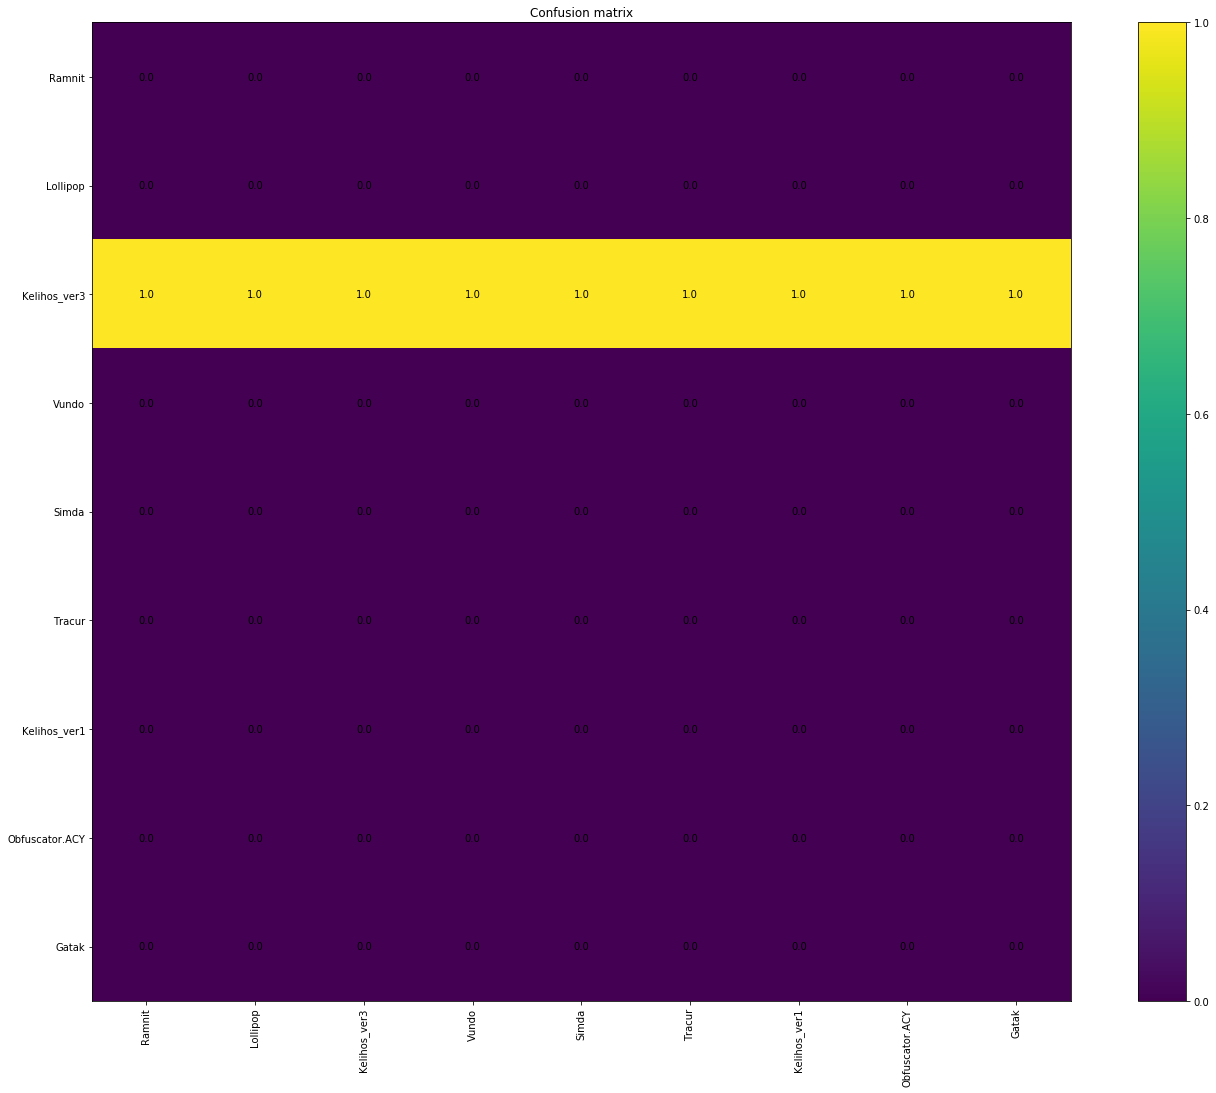

In [29]:
print("Plotting the confusion matrix")
conf_mat = np.around(conf_mat_norm,decimals=2)  # rounding to display in figure
figure = plt.gcf()
figure.set_size_inches(24, 18)
plt.imshow(conf_mat,interpolation='nearest')
for row in range(len(list_fams)):
    for col in range(len(list_fams)):
        plt.annotate(str(conf_mat[row][col]),xy=(col,row),ha='center',va='center')
plt.xticks(range(len(list_fams)),list_fams,rotation=90,fontsize=10)
plt.yticks(range(len(list_fams)),list_fams,fontsize=10)
plt.title('Confusion matrix')
plt.colorbar()
plt.show()